In [ ]:
# !pip install imblearn


In [101]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sklearn.feature_extraction

#from collections import Counter

#import sklearn.ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#import pickle
from sklearn import preprocessing
from sklearn import metrics
from imblearn.over_sampling import SMOTE, ADASYN
 

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
#from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier

%matplotlib inline


In [1]:
global plot_auc, grid_vc
plot_auc = False
grid_vc = False

In [4]:
##### FUNCTIONS #####

## função para plotar matriz de confusão
def plot_cm(cm, labels):
    
    # calcula porcentagens 
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)
    
    print('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()) )

    # Show confusion matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
## function to plot AUC Curve 
def plot_auc_curve(text_clf, X_test, y_test):
    y_pred_proba = text_clf.predict_proba(X_test)[::,1]
    fpr, tpr, _  = sklearn.metrics.roc_curve(y_test,  y_pred_proba)
    auc          = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

## FUNCTION TO RUN MODEL OF THE ML
def run_ml(X_train,X_test,y_train,y_test):

    modelos = [ SVC(),#C= 10, gamma= 0.001, kernel= 'linear', probability= False),
                RandomForestClassifier(),#criterion='entropy', max_depth= None, max_features='sqrt',n_estimators= 10000),
                LogisticRegression(),#solver='lbfgs',multi_class='multinomial',class_weight='balanced',random_state=0),
                #DecisionTreeClassifier(),#max_depth=20, min_samples_split=50), #81.3%
                #ExtraTreesClassifier(),#n_estimators=10, max_depth=None,min_samples_split=2, random_state=0), #80.6%
                #AdaBoostClassifier(),#base_estimator=SVC(),
                                   #learning_rate=1.0,n_estimators=400,algorithm='SAMME'),#n_estimators=10),
                #GradientBoostingClassifier(),#n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0),
                GaussianNB(),
                #BernoulliNB(),
                #MultinomialNB(),
                KNeighborsClassifier(),#n_neighbors=11),
                BaggingClassifier(),#RandomForestClassifier(),max_samples=0.5,max_features=0.5)
                ]


    for m in modelos:
        print("\n==>",m.__class__.__name__)
        text_clf = Pipeline([('clf', m )])

        text_clf  = text_clf.fit(np.asarray(X_train), y_train)
        predicted = text_clf.predict(np.asarray(X_test))
        print("  Accuracy  = %f \n" % accuracy_score(y_test, predicted))
        labels = list(np.unique(y_train)) #[0,1]
        cm     = confusion_matrix(y_test, predicted,labels=labels)    
        plot_cm(cm,labels)

        if hasattr(text_clf, 'predict_proba') and plot_auc:
            plot_auc_curve(text_clf, X_test, y_test)

    print("================================================================================================")

    ##  CHECKING FEATURES IMPORTANCES 
    for m in modelos:
        print("\n==>",m.__class__.__name__)
        cols = X_train.columns
        m.fit(np.asarray(X_train),y_train)

        if hasattr(m, 'feature_importances_'):
            x_labels = X_train.columns[:]
            prob     = list()        
            cols     = list()        
            features = m.feature_importances_
            for i,l in zip(x_labels,features):
                if l*100 > int( np.mean(features)*100 ):
                    cols.append(i)
            print("  Cols: ", cols)

        text_clf  = m.fit(np.asarray(X_train.loc[:,cols]), y_train)
        predicted = text_clf.predict(np.asarray(X_test.loc[:,cols]))

        print("  Accuracy  = %f \n" % accuracy_score(y_test, predicted))
        labels = list(np.unique(y_train)) #[0,1]
        cm     = confusion_matrix(y_test, predicted,labels=labels)    
        plot_cm(cm,labels)
        
        if hasattr(text_clf, 'predict_proba') and plot_auc:
            plot_auc_curve(text_clf, X_test.loc[:,cols], y_test)
           


In [5]:
dados = pd.read_csv("winequality.csv", sep = ';')

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [30]:
dados.isnull().values.any()

False

In [19]:
## identificando registros inconsistentes na coluna alcohol
lista = list()
for i,a in dados.iterrows():
    if len(a["alcohol"]) > 5:
        #print(i,a["alcohol"])
        lista.append(i)

In [58]:
indices  = dados.loc[lista,"quality"].value_counts().index#.plot(kind = 'bar')

In [62]:
dados_clean = dados.iloc[~dados.index.isin(lista),:]
dados_clean.alcohol = pd.to_numeric(dados_clean.alcohol)

In [64]:
for i in indices:
    media = dados_clean.loc[dados_clean.quality == i,'alcohol'].mean()
    dados.loc[(dados.quality == i) & (dados.index.isin(lista)),'alcohol'] = media

In [66]:
dados.alcohol = pd.to_numeric(dados.alcohol)

In [69]:
label_type    = preprocessing.LabelEncoder()
dados["type"] = label_type.fit_transform(dados.type)

In [61]:
#dados.iloc[~dados.index.isin(lista)]

In [105]:
# eliminando registro inconsistentes
#dados = dados.drop(index=lista)

In [70]:
dados.alcohol = pd.to_numeric(dados.alcohol)

In [80]:
x = dados.iloc[:,:-1]
x.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


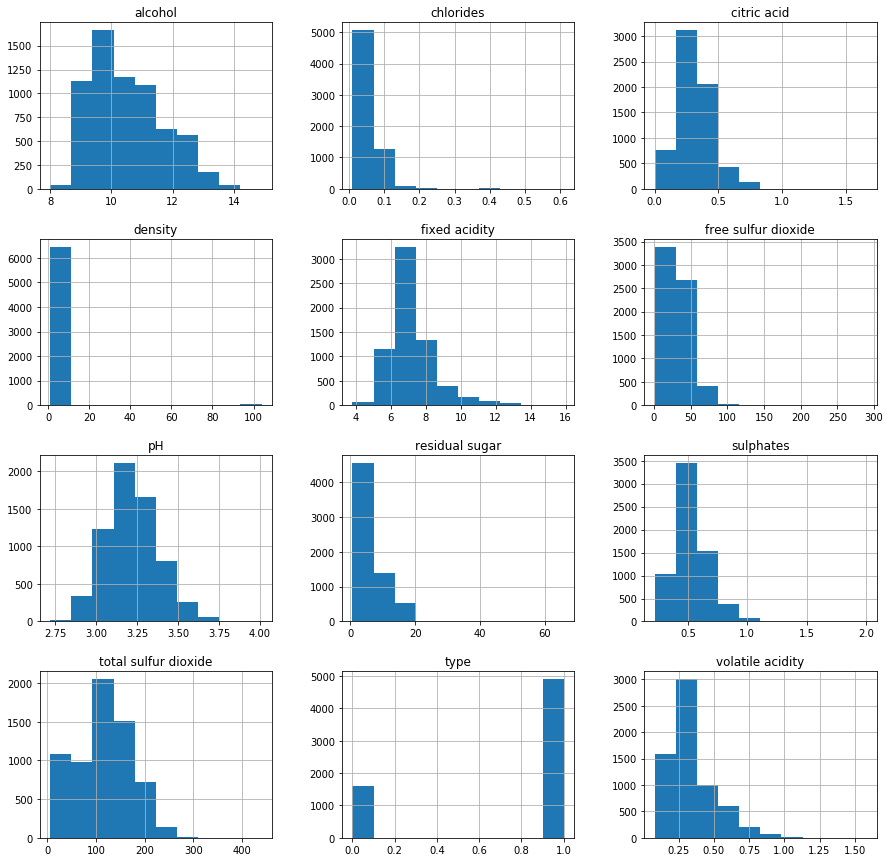

In [81]:
#plt.figure(figsize=(10,10))
x.iloc[:,:].hist(figsize=(15,15))
plt.show()

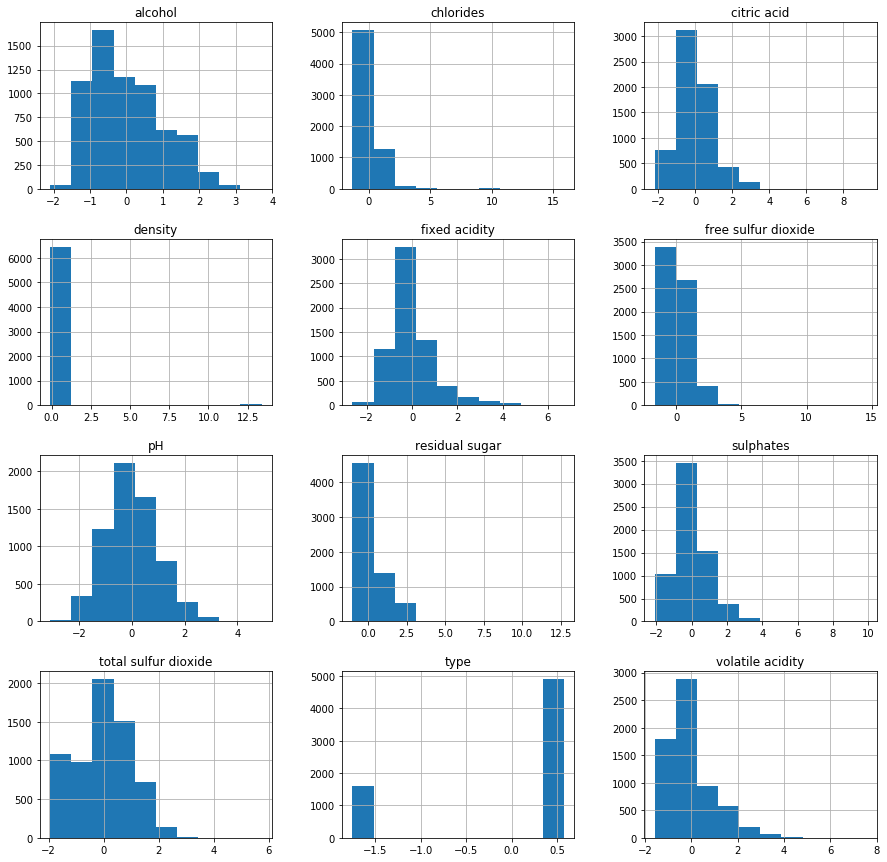

In [88]:
x_norm = preprocessing.scale(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)

x_norm.iloc[:,:].hist(figsize=(15,15))
plt.show()

# <font color = 'red'> 1 - ANÁLISE COM 3 CLASSES </font>

In [89]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]

#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]

y = pd.cut(dados['quality'], bins=bins, labels=quality_labels, include_lowest=True)

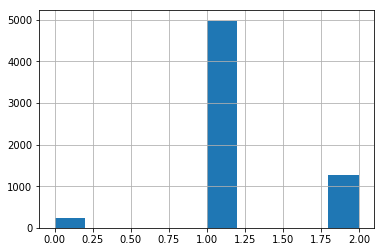

In [90]:
y.hist() #loc[:,'class'].hist()

In [111]:
#dados_clean = dados.drop(columns=['quality'])

In [112]:
#dados_clean.head()

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=4)

In [92]:
x_train.head()
#y_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6189,0,8.2,0.635,0.10,2.10,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
4914,0,8.5,0.280,0.56,1.80,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
5978,0,10.3,0.270,0.56,1.40,0.047,3.0,8.0,0.99471,3.16,0.51,11.8
4651,1,5.7,0.390,0.25,4.90,0.033,49.0,113.0,0.98966,3.26,0.58,13.1
4056,1,6.5,0.430,0.18,13.15,0.032,25.0,131.0,0.99565,3.23,0.51,10.7


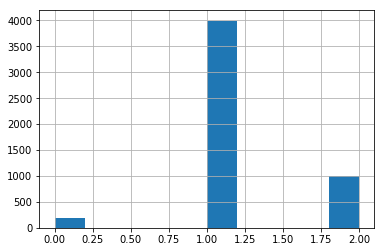

In [94]:
y_train.hist()

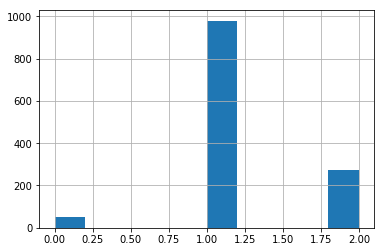

In [95]:
y_test.hist()


==> SVC
  Accuracy  = 0.782308 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 98.00% (49/50)
0/2: 2.00% (1/50)
1/0: 0.00% (0/979)
1/1: 95.40% (934/979)
1/2: 4.60% (45/979)
2/0: 0.00% (0/271)
2/1: 69.37% (188/271)
2/2: 30.63% (83/271)


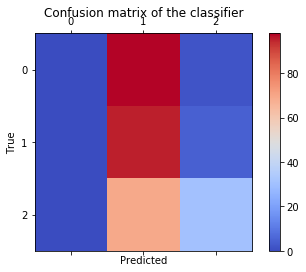


==> RandomForestClassifier
  Accuracy  = 0.827692 

Confusion Matrix Stats
0/0: 6.00% (3/50)
0/1: 90.00% (45/50)
0/2: 4.00% (2/50)
1/0: 0.20% (2/979)
1/1: 95.40% (934/979)
1/2: 4.39% (43/979)
2/0: 0.00% (0/271)
2/1: 48.71% (132/271)
2/2: 51.29% (139/271)


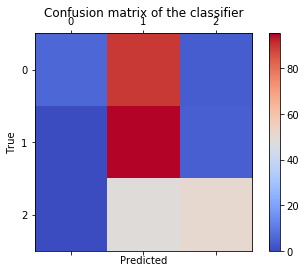


==> LogisticRegression
  Accuracy  = 0.772308 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 98.00% (49/50)
0/2: 2.00% (1/50)
1/0: 0.00% (0/979)
1/1: 97.65% (956/979)
1/2: 2.35% (23/979)
2/0: 0.00% (0/271)
2/1: 82.29% (223/271)
2/2: 17.71% (48/271)


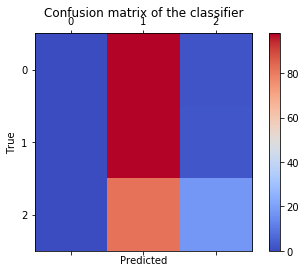


==> GaussianNB
  Accuracy  = 0.679231 

Confusion Matrix Stats
0/0: 16.00% (8/50)
0/1: 62.00% (31/50)
0/2: 22.00% (11/50)
1/0: 4.19% (41/979)
1/1: 69.36% (679/979)
1/2: 26.46% (259/979)
2/0: 0.00% (0/271)
2/1: 27.68% (75/271)
2/2: 72.32% (196/271)


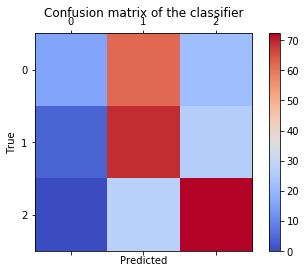


==> KNeighborsClassifier
  Accuracy  = 0.753846 

Confusion Matrix Stats
0/0: 8.00% (4/50)
0/1: 84.00% (42/50)
0/2: 8.00% (4/50)
1/0: 1.23% (12/979)
1/1: 90.30% (884/979)
1/2: 8.48% (83/979)
2/0: 0.00% (0/271)
2/1: 66.05% (179/271)
2/2: 33.95% (92/271)


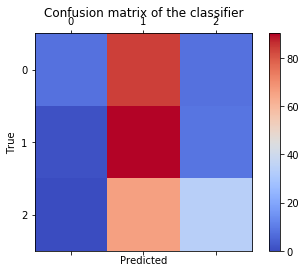


==> BaggingClassifier
  Accuracy  = 0.810769 

Confusion Matrix Stats
0/0: 8.00% (4/50)
0/1: 90.00% (45/50)
0/2: 2.00% (1/50)
1/0: 1.74% (17/979)
1/1: 92.85% (909/979)
1/2: 5.41% (53/979)
2/0: 0.00% (0/271)
2/1: 47.97% (130/271)
2/2: 52.03% (141/271)


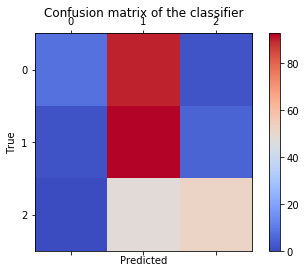


==> SVC
  Accuracy  = 0.782308 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 98.00% (49/50)
0/2: 2.00% (1/50)
1/0: 0.00% (0/979)
1/1: 95.40% (934/979)
1/2: 4.60% (45/979)
2/0: 0.00% (0/271)
2/1: 69.37% (188/271)
2/2: 30.63% (83/271)


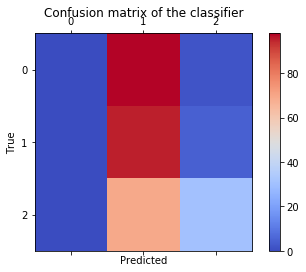


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
  Accuracy  = 0.827692 

Confusion Matrix Stats
0/0: 6.00% (3/50)
0/1: 88.00% (44/50)
0/2: 6.00% (3/50)
1/0: 0.51% (5/979)
1/1: 95.10% (931/979)
1/2: 4.39% (43/979)
2/0: 0.00% (0/271)
2/1: 47.60% (129/271)
2/2: 52.40% (142/271)


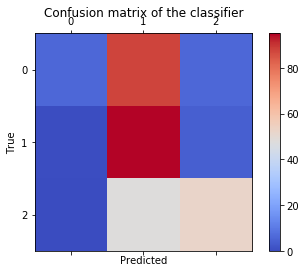


==> LogisticRegression
  Accuracy  = 0.772308 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 98.00% (49/50)
0/2: 2.00% (1/50)
1/0: 0.00% (0/979)
1/1: 97.65% (956/979)
1/2: 2.35% (23/979)
2/0: 0.00% (0/271)
2/1: 82.29% (223/271)
2/2: 17.71% (48/271)


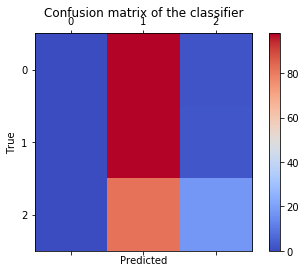


==> GaussianNB
  Accuracy  = 0.679231 

Confusion Matrix Stats
0/0: 16.00% (8/50)
0/1: 62.00% (31/50)
0/2: 22.00% (11/50)
1/0: 4.19% (41/979)
1/1: 69.36% (679/979)
1/2: 26.46% (259/979)
2/0: 0.00% (0/271)
2/1: 27.68% (75/271)
2/2: 72.32% (196/271)


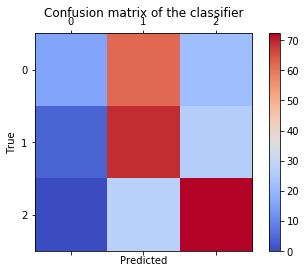


==> KNeighborsClassifier
  Accuracy  = 0.753846 

Confusion Matrix Stats
0/0: 8.00% (4/50)
0/1: 84.00% (42/50)
0/2: 8.00% (4/50)
1/0: 1.23% (12/979)
1/1: 90.30% (884/979)
1/2: 8.48% (83/979)
2/0: 0.00% (0/271)
2/1: 66.05% (179/271)
2/2: 33.95% (92/271)


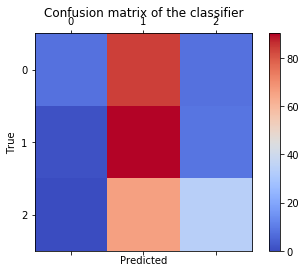


==> BaggingClassifier
  Accuracy  = 0.836923 

Confusion Matrix Stats
0/0: 20.00% (10/50)
0/1: 78.00% (39/50)
0/2: 2.00% (1/50)
1/0: 1.02% (10/979)
1/1: 94.48% (925/979)
1/2: 4.49% (44/979)
2/0: 0.00% (0/271)
2/1: 43.54% (118/271)
2/2: 56.46% (153/271)


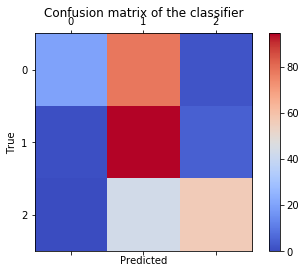

In [96]:
run_ml(x_train,x_test,y_train,y_test)



==> SVC
  Accuracy  = 0.787692 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 100.00% (50/50)
0/2: 0.00% (0/50)
1/0: 0.00% (0/979)
1/1: 96.73% (947/979)
1/2: 3.27% (32/979)
2/0: 0.00% (0/271)
2/1: 71.59% (194/271)
2/2: 28.41% (77/271)


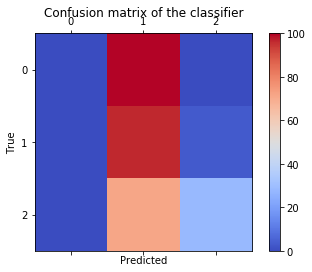


==> RandomForestClassifier
  Accuracy  = 0.820000 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 88.00% (44/50)
0/2: 2.00% (1/50)
1/0: 0.51% (5/979)
1/1: 94.89% (929/979)
1/2: 4.60% (45/979)
2/0: 0.00% (0/271)
2/1: 51.29% (139/271)
2/2: 48.71% (132/271)


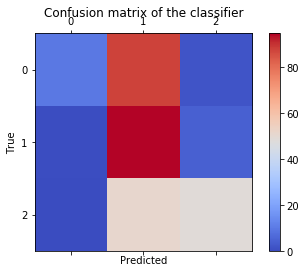


==> LogisticRegression
  Accuracy  = 0.780000 

Confusion Matrix Stats
0/0: 2.00% (1/50)
0/1: 96.00% (48/50)
0/2: 2.00% (1/50)
1/0: 0.10% (1/979)
1/1: 96.53% (945/979)
1/2: 3.37% (33/979)
2/0: 0.00% (0/271)
2/1: 74.91% (203/271)
2/2: 25.09% (68/271)


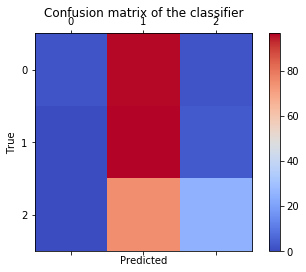


==> GaussianNB
  Accuracy  = 0.679231 

Confusion Matrix Stats
0/0: 16.00% (8/50)
0/1: 62.00% (31/50)
0/2: 22.00% (11/50)
1/0: 4.19% (41/979)
1/1: 69.36% (679/979)
1/2: 26.46% (259/979)
2/0: 0.00% (0/271)
2/1: 27.68% (75/271)
2/2: 72.32% (196/271)


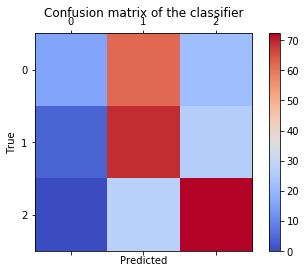


==> KNeighborsClassifier
  Accuracy  = 0.799231 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 84.00% (42/50)
0/2: 6.00% (3/50)
1/0: 0.82% (8/979)
1/1: 91.22% (893/979)
1/2: 7.97% (78/979)
2/0: 0.00% (0/271)
2/1: 47.97% (130/271)
2/2: 52.03% (141/271)


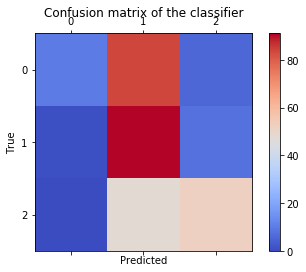


==> BaggingClassifier
  Accuracy  = 0.833846 

Confusion Matrix Stats
0/0: 18.00% (9/50)
0/1: 76.00% (38/50)
0/2: 6.00% (3/50)
1/0: 1.02% (10/979)
1/1: 94.48% (925/979)
1/2: 4.49% (44/979)
2/0: 0.00% (0/271)
2/1: 44.65% (121/271)
2/2: 55.35% (150/271)


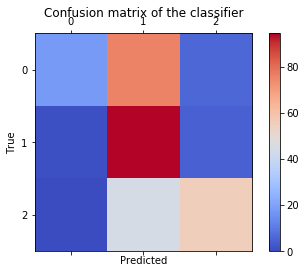


==> SVC
  Accuracy  = 0.787692 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 100.00% (50/50)
0/2: 0.00% (0/50)
1/0: 0.00% (0/979)
1/1: 96.73% (947/979)
1/2: 3.27% (32/979)
2/0: 0.00% (0/271)
2/1: 71.59% (194/271)
2/2: 28.41% (77/271)


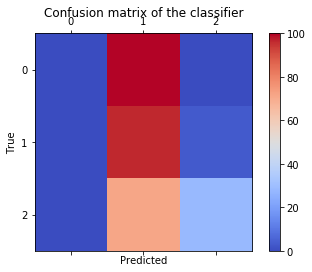


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']
  Accuracy  = 0.818462 

Confusion Matrix Stats
0/0: 8.00% (4/50)
0/1: 92.00% (46/50)
0/2: 0.00% (0/50)
1/0: 0.72% (7/979)
1/1: 94.89% (929/979)
1/2: 4.39% (43/979)
2/0: 0.37% (1/271)
2/1: 51.29% (139/271)
2/2: 48.34% (131/271)


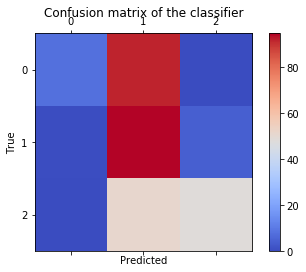


==> LogisticRegression
  Accuracy  = 0.780000 

Confusion Matrix Stats
0/0: 2.00% (1/50)
0/1: 96.00% (48/50)
0/2: 2.00% (1/50)
1/0: 0.10% (1/979)
1/1: 96.53% (945/979)
1/2: 3.37% (33/979)
2/0: 0.00% (0/271)
2/1: 74.91% (203/271)
2/2: 25.09% (68/271)


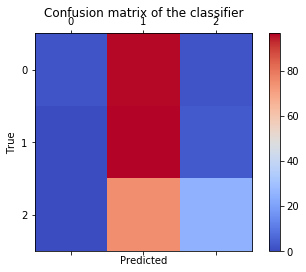


==> GaussianNB
  Accuracy  = 0.679231 

Confusion Matrix Stats
0/0: 16.00% (8/50)
0/1: 62.00% (31/50)
0/2: 22.00% (11/50)
1/0: 4.19% (41/979)
1/1: 69.36% (679/979)
1/2: 26.46% (259/979)
2/0: 0.00% (0/271)
2/1: 27.68% (75/271)
2/2: 72.32% (196/271)


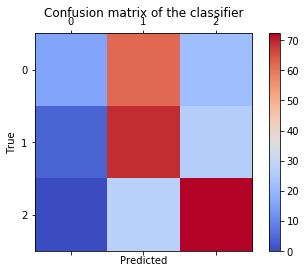


==> KNeighborsClassifier
  Accuracy  = 0.799231 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 84.00% (42/50)
0/2: 6.00% (3/50)
1/0: 0.82% (8/979)
1/1: 91.22% (893/979)
1/2: 7.97% (78/979)
2/0: 0.00% (0/271)
2/1: 47.97% (130/271)
2/2: 52.03% (141/271)


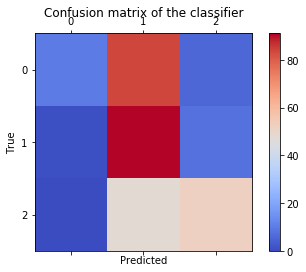


==> BaggingClassifier
  Accuracy  = 0.823846 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 82.00% (41/50)
0/2: 8.00% (4/50)
1/0: 0.82% (8/979)
1/1: 93.97% (920/979)
1/2: 5.21% (51/979)
2/0: 0.37% (1/271)
2/1: 45.76% (124/271)
2/2: 53.87% (146/271)


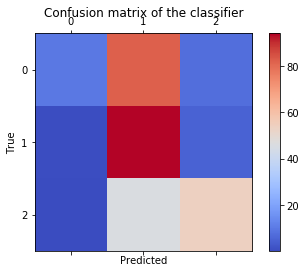

### <font color = 'red'>  1.1 - MODELOS COM DADOS BALANCEADOS </font>

In [111]:
data_o, target_o = SMOTE().fit_sample(x,y)
data_o = pd.DataFrame(data_o, columns= x.columns)
target_o = pd.DataFrame(target_o, columns= dados_clean.iloc[:,-1:].columns)

#data_o.head()


==> SVC
  Accuracy  = 0.873702 

Confusion Matrix Stats
0/0: 94.29% (957/1015)
0/1: 5.02% (51/1015)
0/2: 0.69% (7/1015)
1/0: 8.97% (91/1014)
1/1: 75.64% (767/1014)
1/2: 15.38% (156/1014)
2/0: 0.84% (8/956)
2/1: 6.69% (64/956)
2/2: 92.47% (884/956)


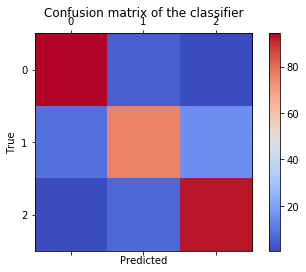


==> RandomForestClassifier
  Accuracy  = 0.908543 

Confusion Matrix Stats
0/0: 98.23% (997/1015)
0/1: 1.38% (14/1015)
0/2: 0.39% (4/1015)
1/0: 5.72% (58/1014)
1/1: 83.33% (845/1014)
1/2: 10.95% (111/1014)
2/0: 0.52% (5/956)
2/1: 8.47% (81/956)
2/2: 91.00% (870/956)


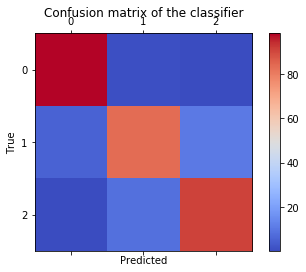


==> LogisticRegression
  Accuracy  = 0.651926 

Confusion Matrix Stats
0/0: 72.22% (733/1015)
0/1: 18.03% (183/1015)
0/2: 9.75% (99/1015)
1/0: 25.64% (260/1014)
1/1: 43.00% (436/1014)
1/2: 31.36% (318/1014)
2/0: 4.92% (47/956)
2/1: 13.81% (132/956)
2/2: 81.28% (777/956)


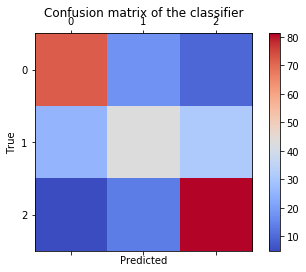


==> GaussianNB
  Accuracy  = 0.500838 

Confusion Matrix Stats
0/0: 50.44% (512/1015)
0/1: 10.54% (107/1015)
0/2: 39.01% (396/1015)
1/0: 28.30% (287/1014)
1/1: 18.15% (184/1014)
1/2: 53.55% (543/1014)
2/0: 5.02% (48/956)
2/1: 11.40% (109/956)
2/2: 83.58% (799/956)


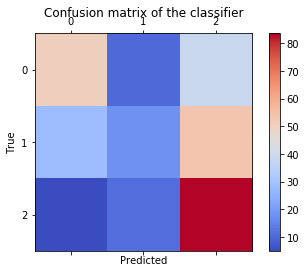


==> KNeighborsClassifier
  Accuracy  = 0.822781 

Confusion Matrix Stats
0/0: 96.65% (981/1015)
0/1: 2.27% (23/1015)
0/2: 1.08% (11/1015)
1/0: 17.36% (176/1014)
1/1: 58.48% (593/1014)
1/2: 24.16% (245/1014)
2/0: 1.99% (19/956)
2/1: 5.75% (55/956)
2/2: 92.26% (882/956)


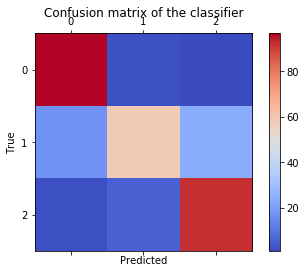


==> BaggingClassifier
  Accuracy  = 0.909213 

Confusion Matrix Stats
0/0: 97.64% (991/1015)
0/1: 2.07% (21/1015)
0/2: 0.30% (3/1015)
1/0: 5.62% (57/1014)
1/1: 83.43% (846/1014)
1/2: 10.95% (111/1014)
2/0: 0.52% (5/956)
2/1: 7.74% (74/956)
2/2: 91.74% (877/956)


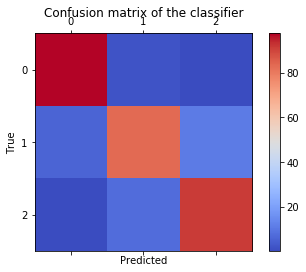


==> SVC
  Accuracy  = 0.873702 

Confusion Matrix Stats
0/0: 94.29% (957/1015)
0/1: 5.02% (51/1015)
0/2: 0.69% (7/1015)
1/0: 8.97% (91/1014)
1/1: 75.64% (767/1014)
1/2: 15.38% (156/1014)
2/0: 0.84% (8/956)
2/1: 6.69% (64/956)
2/2: 92.47% (884/956)


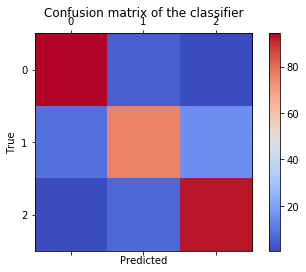


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
  Accuracy  = 0.889782 

Confusion Matrix Stats
0/0: 95.96% (974/1015)
0/1: 3.35% (34/1015)
0/2: 0.69% (7/1015)
1/0: 7.89% (80/1014)
1/1: 82.74% (839/1014)
1/2: 9.37% (95/1014)
2/0: 1.26% (12/956)
2/1: 10.56% (101/956)
2/2: 88.18% (843/956)


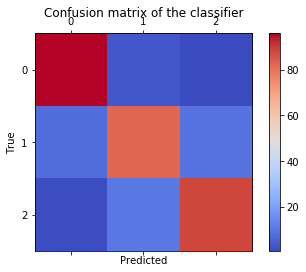


==> LogisticRegression
  Accuracy  = 0.651926 

Confusion Matrix Stats
0/0: 72.22% (733/1015)
0/1: 18.03% (183/1015)
0/2: 9.75% (99/1015)
1/0: 25.64% (260/1014)
1/1: 43.00% (436/1014)
1/2: 31.36% (318/1014)
2/0: 4.92% (47/956)
2/1: 13.81% (132/956)
2/2: 81.28% (777/956)


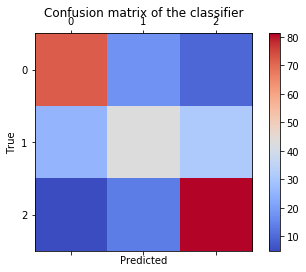


==> GaussianNB
  Accuracy  = 0.500838 

Confusion Matrix Stats
0/0: 50.44% (512/1015)
0/1: 10.54% (107/1015)
0/2: 39.01% (396/1015)
1/0: 28.30% (287/1014)
1/1: 18.15% (184/1014)
1/2: 53.55% (543/1014)
2/0: 5.02% (48/956)
2/1: 11.40% (109/956)
2/2: 83.58% (799/956)


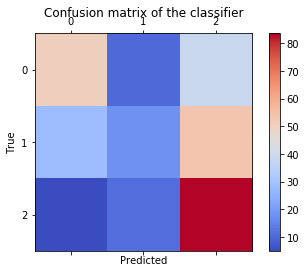


==> KNeighborsClassifier
  Accuracy  = 0.822781 

Confusion Matrix Stats
0/0: 96.65% (981/1015)
0/1: 2.27% (23/1015)
0/2: 1.08% (11/1015)
1/0: 17.36% (176/1014)
1/1: 58.48% (593/1014)
1/2: 24.16% (245/1014)
2/0: 1.99% (19/956)
2/1: 5.75% (55/956)
2/2: 92.26% (882/956)


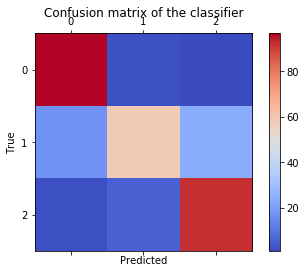


==> BaggingClassifier
  Accuracy  = 0.908208 

Confusion Matrix Stats
0/0: 97.64% (991/1015)
0/1: 2.17% (22/1015)
0/2: 0.20% (2/1015)
1/0: 5.72% (58/1014)
1/1: 82.54% (837/1014)
1/2: 11.74% (119/1014)
2/0: 0.52% (5/956)
2/1: 7.11% (68/956)
2/2: 92.36% (883/956)


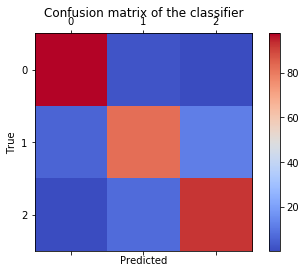

In [112]:
x_train_balanc, x_test_balanc, y_train_balanc, y_test_balanc = train_test_split(data_o,
                                                                                target_o, 
                                                    test_size=0.20, random_state=4)

run_ml(x_train_balanc,x_test_balanc,y_train_balanc,y_test_balanc)


### <font color = 'red'>  1.2 - MODELOS (3 CLASSES) COM DADOS NORMALIZADOS </font>



==> SVC
  Accuracy  = 0.787692 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 100.00% (50/50)
0/2: 0.00% (0/50)
1/0: 0.00% (0/979)
1/1: 96.73% (947/979)
1/2: 3.27% (32/979)
2/0: 0.00% (0/271)
2/1: 71.59% (194/271)
2/2: 28.41% (77/271)


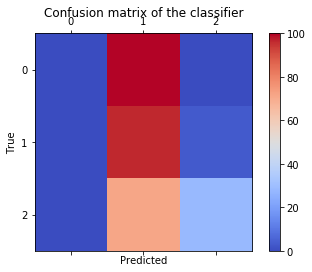


==> RandomForestClassifier
  Accuracy  = 0.828462 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 84.00% (42/50)
0/2: 6.00% (3/50)
1/0: 0.82% (8/979)
1/1: 94.79% (928/979)
1/2: 4.39% (43/979)
2/0: 0.00% (0/271)
2/1: 46.86% (127/271)
2/2: 53.14% (144/271)


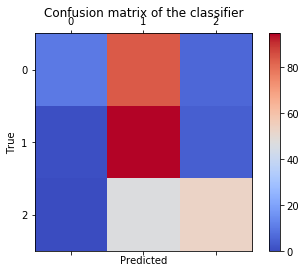


==> LogisticRegression
  Accuracy  = 0.780000 

Confusion Matrix Stats
0/0: 2.00% (1/50)
0/1: 96.00% (48/50)
0/2: 2.00% (1/50)
1/0: 0.10% (1/979)
1/1: 96.53% (945/979)
1/2: 3.37% (33/979)
2/0: 0.00% (0/271)
2/1: 74.91% (203/271)
2/2: 25.09% (68/271)


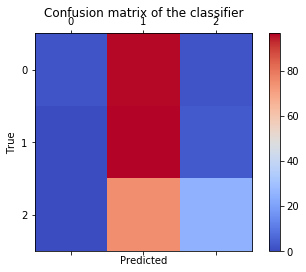


==> GaussianNB
  Accuracy  = 0.679231 

Confusion Matrix Stats
0/0: 16.00% (8/50)
0/1: 62.00% (31/50)
0/2: 22.00% (11/50)
1/0: 4.19% (41/979)
1/1: 69.36% (679/979)
1/2: 26.46% (259/979)
2/0: 0.00% (0/271)
2/1: 27.68% (75/271)
2/2: 72.32% (196/271)


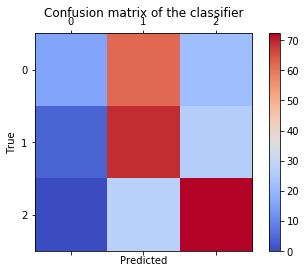


==> KNeighborsClassifier
  Accuracy  = 0.799231 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 84.00% (42/50)
0/2: 6.00% (3/50)
1/0: 0.82% (8/979)
1/1: 91.22% (893/979)
1/2: 7.97% (78/979)
2/0: 0.00% (0/271)
2/1: 47.97% (130/271)
2/2: 52.03% (141/271)


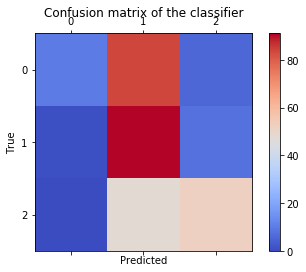


==> BaggingClassifier
  Accuracy  = 0.836923 

Confusion Matrix Stats
0/0: 18.00% (9/50)
0/1: 80.00% (40/50)
0/2: 2.00% (1/50)
1/0: 0.72% (7/979)
1/1: 94.18% (922/979)
1/2: 5.11% (50/979)
2/0: 0.00% (0/271)
2/1: 42.07% (114/271)
2/2: 57.93% (157/271)


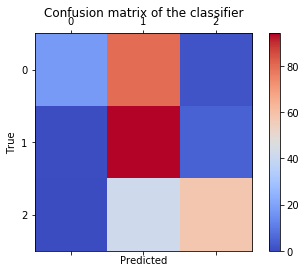


==> SVC
  Accuracy  = 0.787692 

Confusion Matrix Stats
0/0: 0.00% (0/50)
0/1: 100.00% (50/50)
0/2: 0.00% (0/50)
1/0: 0.00% (0/979)
1/1: 96.73% (947/979)
1/2: 3.27% (32/979)
2/0: 0.00% (0/271)
2/1: 71.59% (194/271)
2/2: 28.41% (77/271)


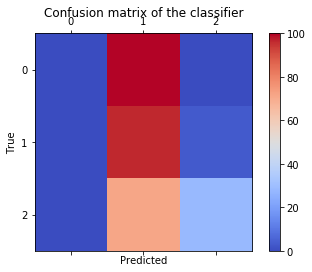


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
  Accuracy  = 0.826923 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 86.00% (43/50)
0/2: 4.00% (2/50)
1/0: 0.31% (3/979)
1/1: 95.40% (934/979)
1/2: 4.29% (42/979)
2/0: 0.00% (0/271)
2/1: 49.82% (135/271)
2/2: 50.18% (136/271)


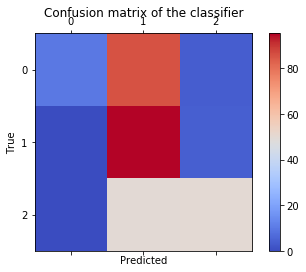


==> LogisticRegression
  Accuracy  = 0.780000 

Confusion Matrix Stats
0/0: 2.00% (1/50)
0/1: 96.00% (48/50)
0/2: 2.00% (1/50)
1/0: 0.10% (1/979)
1/1: 96.53% (945/979)
1/2: 3.37% (33/979)
2/0: 0.00% (0/271)
2/1: 74.91% (203/271)
2/2: 25.09% (68/271)


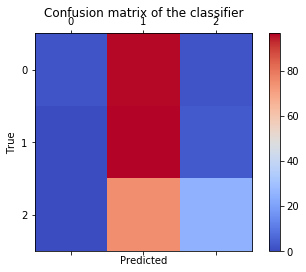


==> GaussianNB
  Accuracy  = 0.679231 

Confusion Matrix Stats
0/0: 16.00% (8/50)
0/1: 62.00% (31/50)
0/2: 22.00% (11/50)
1/0: 4.19% (41/979)
1/1: 69.36% (679/979)
1/2: 26.46% (259/979)
2/0: 0.00% (0/271)
2/1: 27.68% (75/271)
2/2: 72.32% (196/271)


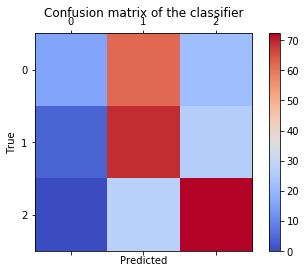


==> KNeighborsClassifier
  Accuracy  = 0.799231 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 84.00% (42/50)
0/2: 6.00% (3/50)
1/0: 0.82% (8/979)
1/1: 91.22% (893/979)
1/2: 7.97% (78/979)
2/0: 0.00% (0/271)
2/1: 47.97% (130/271)
2/2: 52.03% (141/271)


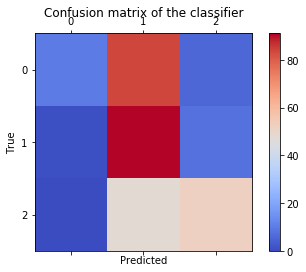


==> BaggingClassifier
  Accuracy  = 0.830000 

Confusion Matrix Stats
0/0: 10.00% (5/50)
0/1: 86.00% (43/50)
0/2: 4.00% (2/50)
1/0: 0.92% (9/979)
1/1: 95.10% (931/979)
1/2: 3.98% (39/979)
2/0: 0.00% (0/271)
2/1: 47.23% (128/271)
2/2: 52.77% (143/271)


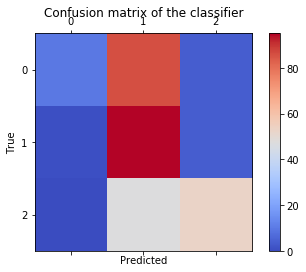

In [108]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y,
                                                                        test_size=0.20, random_state=4)
run_ml(x_train_norm,x_test_norm,y_train_norm,y_test_norm)


### <font color = 'red'>  1.3 - MODELOS (3 CLASSES) COM DADOS NORMALIZADOS E BALANCEADOS </font>



==> SVC
  Accuracy  = 0.794975 

Confusion Matrix Stats
0/0: 91.23% (926/1015)
0/1: 6.21% (63/1015)
0/2: 2.56% (26/1015)
1/0: 16.86% (171/1014)
1/1: 59.47% (603/1014)
1/2: 23.67% (240/1014)
2/0: 2.82% (27/956)
2/1: 8.89% (85/956)
2/2: 88.28% (844/956)


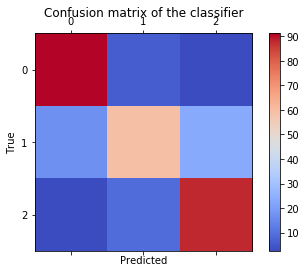


==> RandomForestClassifier
  Accuracy  = 0.916918 

Confusion Matrix Stats
0/0: 98.72% (1002/1015)
0/1: 0.89% (9/1015)
0/2: 0.39% (4/1015)
1/0: 5.03% (51/1014)
1/1: 85.31% (865/1014)
1/2: 9.66% (98/1014)
2/0: 0.31% (3/956)
2/1: 8.68% (83/956)
2/2: 91.00% (870/956)


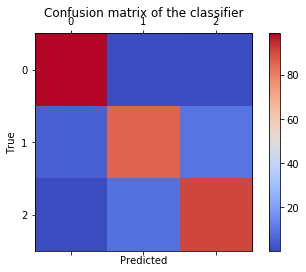


==> LogisticRegression
  Accuracy  = 0.650251 

Confusion Matrix Stats
0/0: 70.05% (711/1015)
0/1: 19.01% (193/1015)
0/2: 10.94% (111/1015)
1/0: 25.35% (257/1014)
1/1: 43.89% (445/1014)
1/2: 30.77% (312/1014)
2/0: 5.75% (55/956)
2/1: 12.13% (116/956)
2/2: 82.11% (785/956)


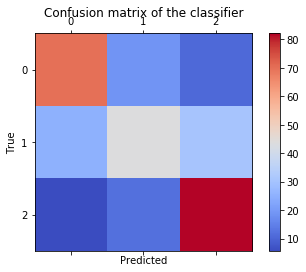


==> GaussianNB
  Accuracy  = 0.487772 

Confusion Matrix Stats
0/0: 47.19% (479/1015)
0/1: 11.03% (112/1015)
0/2: 41.77% (424/1015)
1/0: 29.09% (295/1014)
1/1: 16.37% (166/1014)
1/2: 54.54% (553/1014)
2/0: 7.85% (75/956)
2/1: 7.32% (70/956)
2/2: 84.83% (811/956)


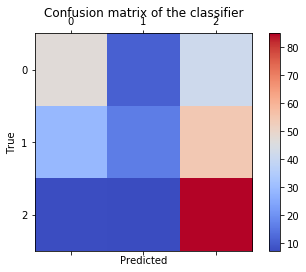


==> KNeighborsClassifier
  Accuracy  = 0.873032 

Confusion Matrix Stats
0/0: 99.70% (1012/1015)
0/1: 0.20% (2/1015)
0/2: 0.10% (1/1015)
1/0: 14.30% (145/1014)
1/1: 65.38% (663/1014)
1/2: 20.32% (206/1014)
2/0: 0.31% (3/956)
2/1: 2.30% (22/956)
2/2: 97.38% (931/956)


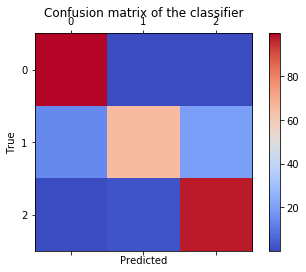


==> BaggingClassifier
  Accuracy  = 0.908878 

Confusion Matrix Stats
0/0: 97.73% (992/1015)
0/1: 1.77% (18/1015)
0/2: 0.49% (5/1015)
1/0: 7.40% (75/1014)
1/1: 83.33% (845/1014)
1/2: 9.27% (94/1014)
2/0: 0.63% (6/956)
2/1: 7.74% (74/956)
2/2: 91.63% (876/956)


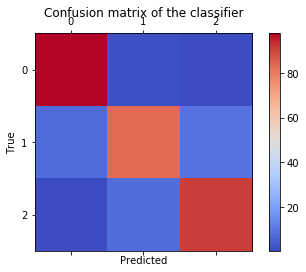


==> SVC
  Accuracy  = 0.794975 

Confusion Matrix Stats
0/0: 91.23% (926/1015)
0/1: 6.21% (63/1015)
0/2: 2.56% (26/1015)
1/0: 16.86% (171/1014)
1/1: 59.47% (603/1014)
1/2: 23.67% (240/1014)
2/0: 2.82% (27/956)
2/1: 8.89% (85/956)
2/2: 88.28% (844/956)


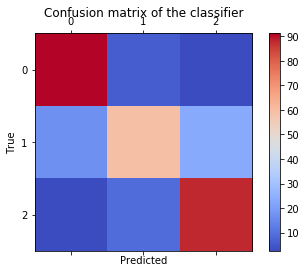


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']
  Accuracy  = 0.882747 

Confusion Matrix Stats
0/0: 94.98% (964/1015)
0/1: 4.43% (45/1015)
0/2: 0.59% (6/1015)
1/0: 7.10% (72/1014)
1/1: 81.76% (829/1014)
1/2: 11.14% (113/1014)
2/0: 2.09% (20/956)
2/1: 9.83% (94/956)
2/2: 88.08% (842/956)


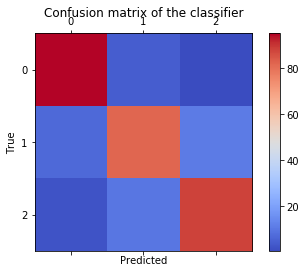


==> LogisticRegression
  Accuracy  = 0.650251 

Confusion Matrix Stats
0/0: 70.05% (711/1015)
0/1: 19.01% (193/1015)
0/2: 10.94% (111/1015)
1/0: 25.35% (257/1014)
1/1: 43.89% (445/1014)
1/2: 30.77% (312/1014)
2/0: 5.75% (55/956)
2/1: 12.13% (116/956)
2/2: 82.11% (785/956)


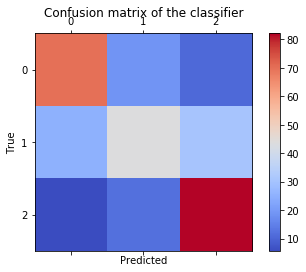


==> GaussianNB
  Accuracy  = 0.487772 

Confusion Matrix Stats
0/0: 47.19% (479/1015)
0/1: 11.03% (112/1015)
0/2: 41.77% (424/1015)
1/0: 29.09% (295/1014)
1/1: 16.37% (166/1014)
1/2: 54.54% (553/1014)
2/0: 7.85% (75/956)
2/1: 7.32% (70/956)
2/2: 84.83% (811/956)


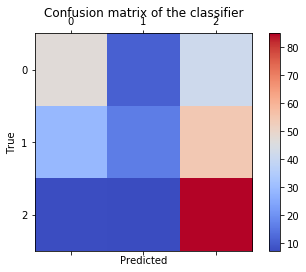


==> KNeighborsClassifier
  Accuracy  = 0.873032 

Confusion Matrix Stats
0/0: 99.70% (1012/1015)
0/1: 0.20% (2/1015)
0/2: 0.10% (1/1015)
1/0: 14.30% (145/1014)
1/1: 65.38% (663/1014)
1/2: 20.32% (206/1014)
2/0: 0.31% (3/956)
2/1: 2.30% (22/956)
2/2: 97.38% (931/956)


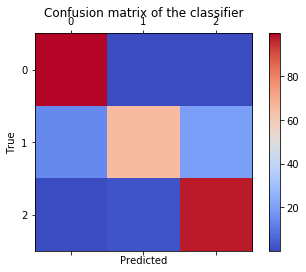


==> BaggingClassifier
  Accuracy  = 0.918928 

Confusion Matrix Stats
0/0: 98.42% (999/1015)
0/1: 1.48% (15/1015)
0/2: 0.10% (1/1015)
1/0: 5.72% (58/1014)
1/1: 85.21% (864/1014)
1/2: 9.07% (92/1014)
2/0: 0.84% (8/956)
2/1: 7.11% (68/956)
2/2: 92.05% (880/956)


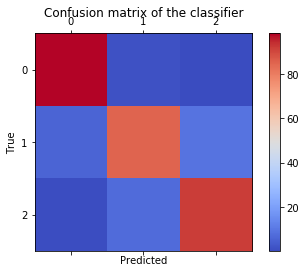

In [114]:
data_o_norm, target_o_norm = SMOTE().fit_sample(x_norm,y)

data_o_norm   = pd.DataFrame(data_o_norm, columns= x.columns)
target_o_norm = pd.DataFrame(target_o_norm, columns= dados_clean.iloc[:,-1:].columns)

#data_o.head()
x_train_norm_balanc, x_test_norm_balanc, \
y_train_norm_balanc, y_test_norm_balanc = train_test_split(data_o_norm, target_o_norm, 
                                                    test_size=0.20, random_state=4)

run_ml(x_train_norm_balanc,x_test_norm_balanc,y_train_norm_balanc,y_test_norm_balanc)


# <font color = 'red'> 2 - ANÁLISE COM 2 CLASSES </font>

In [61]:
np.mean(dados.quality)

5.81709772340096

In [132]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [2, 6.5, 8]

#1 for average, 2 for great quality
quality_labels=[0,1]


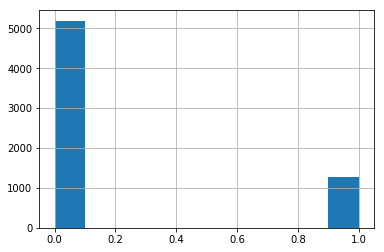

In [133]:
dados['class'] = pd.cut(dados['quality'], bins=bins, labels=quality_labels, include_lowest=True)
label_type    = preprocessing.LabelEncoder()
dados["type"] = label_type.fit_transform(dados.type)

dados.loc[:,'class'].hist()

In [121]:
dados_clean = dados.drop(columns=['quality'])


In [122]:
x_train, x_test, y_train, y_test = train_test_split(dados_clean.iloc[:,:-1], 
                                                    dados_clean.iloc[:,-1:], 
                                                    test_size=0.30, random_state=4)

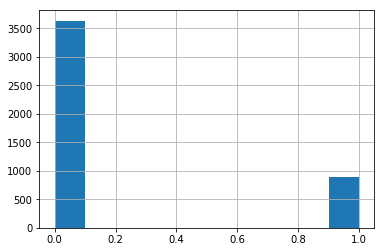

In [123]:
y_train.loc[:,'class'].hist()

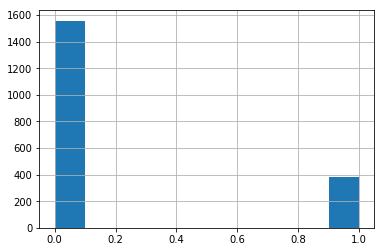

In [124]:
y_test.loc[:,'class'].hist()


==> SVC
  Accuracy  = 0.832817 

Confusion Matrix Stats
0/0: 96.98% (1511/1558)
0/1: 3.02% (47/1558)
1/0: 72.89% (277/380)
1/1: 27.11% (103/380)


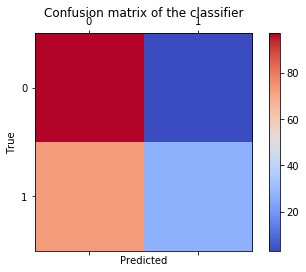


==> RandomForestClassifier
  Accuracy  = 0.871001 

Confusion Matrix Stats
0/0: 96.02% (1496/1558)
0/1: 3.98% (62/1558)
1/0: 49.47% (188/380)
1/1: 50.53% (192/380)


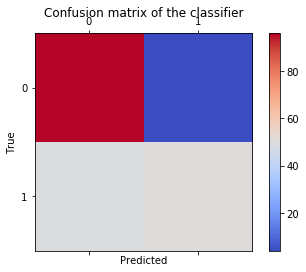

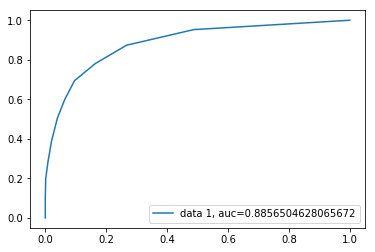


==> LogisticRegression
  Accuracy  = 0.815273 

Confusion Matrix Stats
0/0: 96.98% (1511/1558)
0/1: 3.02% (47/1558)
1/0: 81.84% (311/380)
1/1: 18.16% (69/380)


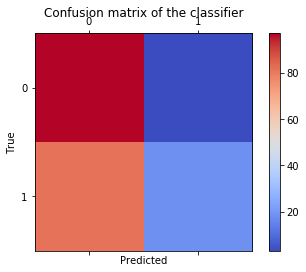

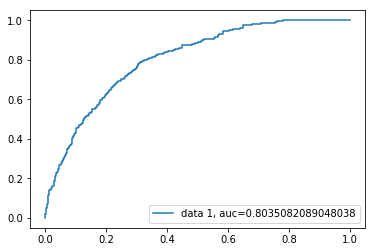


==> GaussianNB
  Accuracy  = 0.725490 

Confusion Matrix Stats
0/0: 72.85% (1135/1558)
0/1: 27.15% (423/1558)
1/0: 28.68% (109/380)
1/1: 71.32% (271/380)


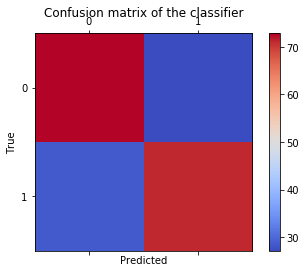

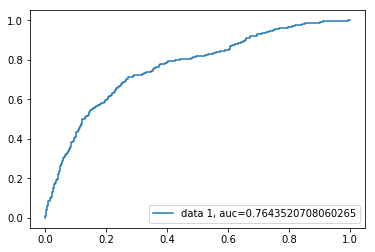


==> KNeighborsClassifier
  Accuracy  = 0.812178 

Confusion Matrix Stats
0/0: 92.81% (1446/1558)
0/1: 7.19% (112/1558)
1/0: 66.32% (252/380)
1/1: 33.68% (128/380)


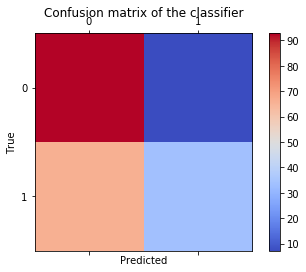

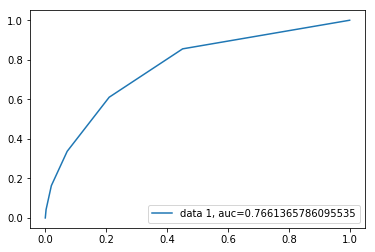


==> BaggingClassifier
  Accuracy  = 0.866873 

Confusion Matrix Stats
0/0: 95.70% (1491/1558)
0/1: 4.30% (67/1558)
1/0: 50.26% (191/380)
1/1: 49.74% (189/380)


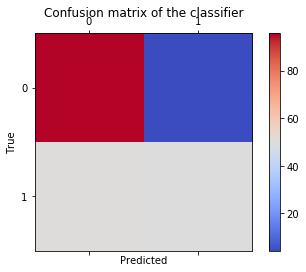

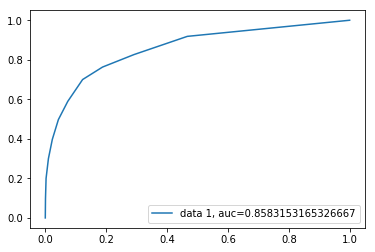


==> SVC
  Accuracy  = 0.832817 

Confusion Matrix Stats
0/0: 96.98% (1511/1558)
0/1: 3.02% (47/1558)
1/0: 72.89% (277/380)
1/1: 27.11% (103/380)


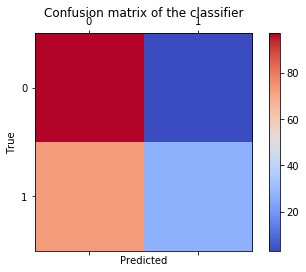


==> RandomForestClassifier
  Cols:  ['residual sugar', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
  Accuracy  = 0.862229 

Confusion Matrix Stats
0/0: 95.19% (1483/1558)
0/1: 4.81% (75/1558)
1/0: 50.53% (192/380)
1/1: 49.47% (188/380)


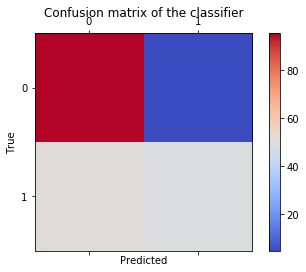

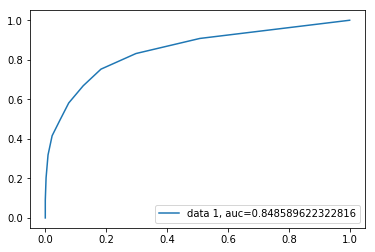


==> LogisticRegression
  Accuracy  = 0.815273 

Confusion Matrix Stats
0/0: 96.98% (1511/1558)
0/1: 3.02% (47/1558)
1/0: 81.84% (311/380)
1/1: 18.16% (69/380)


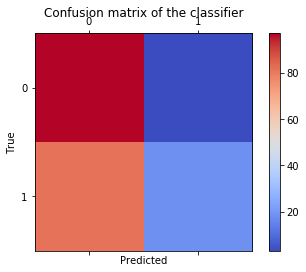

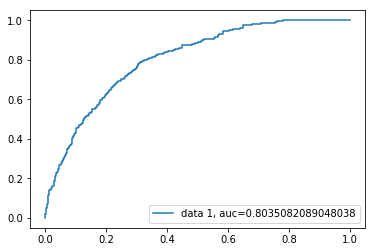


==> GaussianNB
  Accuracy  = 0.725490 

Confusion Matrix Stats
0/0: 72.85% (1135/1558)
0/1: 27.15% (423/1558)
1/0: 28.68% (109/380)
1/1: 71.32% (271/380)


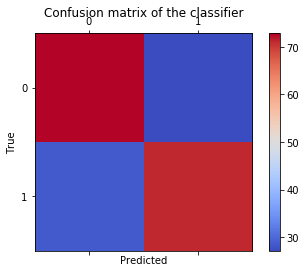

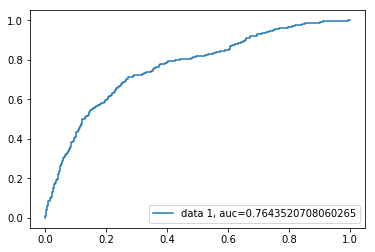


==> KNeighborsClassifier
  Accuracy  = 0.812178 

Confusion Matrix Stats
0/0: 92.81% (1446/1558)
0/1: 7.19% (112/1558)
1/0: 66.32% (252/380)
1/1: 33.68% (128/380)


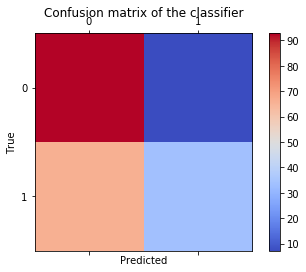

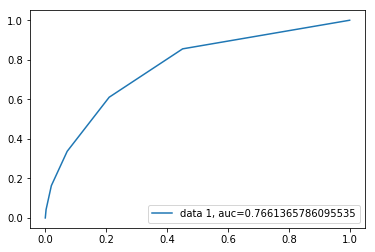


==> BaggingClassifier
  Accuracy  = 0.865841 

Confusion Matrix Stats
0/0: 96.21% (1499/1558)
0/1: 3.79% (59/1558)
1/0: 52.89% (201/380)
1/1: 47.11% (179/380)


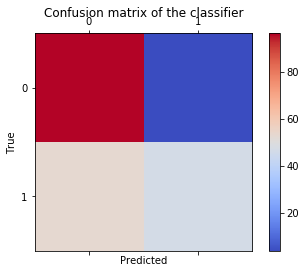

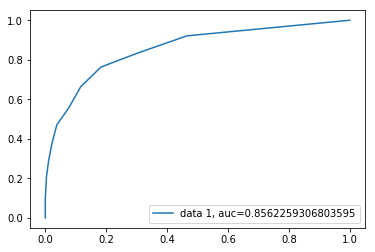

In [127]:
plot_auc = True
run_ml(x_train,x_test,y_train,y_test)


# <font color = 'red'>  2.1 - MODELOS PARA 2 CLASSES COM DADOS BALANCEADOS </font>

In [128]:
from imblearn.over_sampling import SMOTE, ADASYN
data_o, target_o = SMOTE().fit_sample(dados_clean.iloc[:,:-1],dados_clean.iloc[:,-1:], )
data_o = pd.DataFrame(data_o, columns= dados_clean.iloc[:,:-1].columns)
target_o = pd.DataFrame(target_o, columns= dados_clean.iloc[:,-1:].columns)


x_train, x_test, y_train, y_test = train_test_split(data_o,target_o, 
                                                    test_size=0.30, random_state=4)


==> SVC
  Accuracy  = 0.865768 

Confusion Matrix Stats
0/0: 81.41% (1305/1603)
0/1: 18.59% (298/1603)
1/0: 7.94% (120/1511)
1/1: 92.06% (1391/1511)


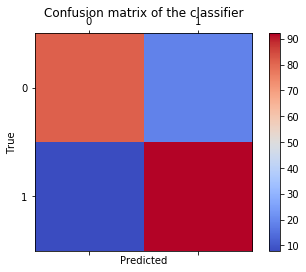


==> RandomForestClassifier
  Accuracy  = 0.884714 

Confusion Matrix Stats
0/0: 86.46% (1386/1603)
0/1: 13.54% (217/1603)
1/0: 9.40% (142/1511)
1/1: 90.60% (1369/1511)


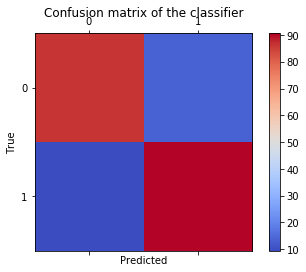

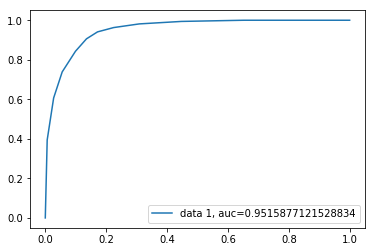


==> LogisticRegression
  Accuracy  = 0.739884 

Confusion Matrix Stats
0/0: 69.31% (1111/1603)
0/1: 30.69% (492/1603)
1/0: 21.05% (318/1511)
1/1: 78.95% (1193/1511)


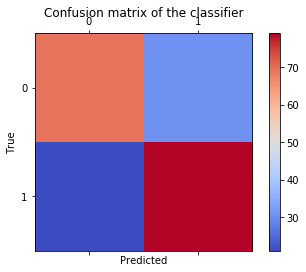

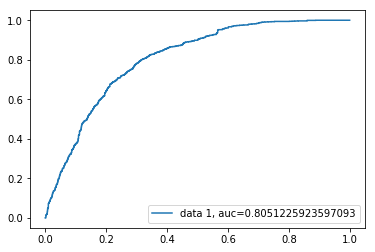


==> GaussianNB
  Accuracy  = 0.619782 

Confusion Matrix Stats
0/0: 39.43% (632/1603)
0/1: 60.57% (971/1603)
1/0: 14.10% (213/1511)
1/1: 85.90% (1298/1511)


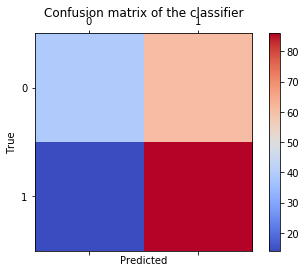

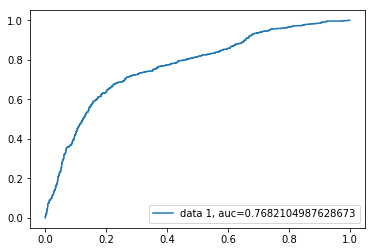


==> KNeighborsClassifier
  Accuracy  = 0.806358 

Confusion Matrix Stats
0/0: 68.75% (1102/1603)
0/1: 31.25% (501/1603)
1/0: 6.75% (102/1511)
1/1: 93.25% (1409/1511)


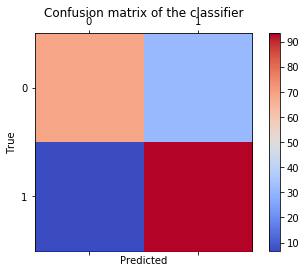

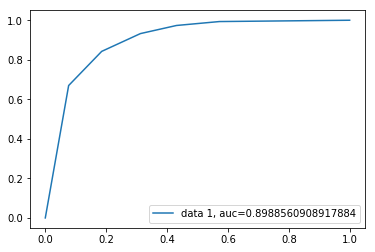


==> BaggingClassifier
  Accuracy  = 0.881182 

Confusion Matrix Stats
0/0: 87.77% (1407/1603)
0/1: 12.23% (196/1603)
1/0: 11.52% (174/1511)
1/1: 88.48% (1337/1511)


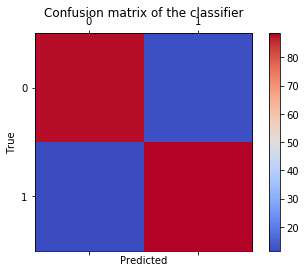

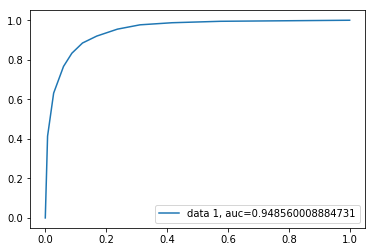


==> SVC
  Accuracy  = 0.865768 

Confusion Matrix Stats
0/0: 81.41% (1305/1603)
0/1: 18.59% (298/1603)
1/0: 7.94% (120/1511)
1/1: 92.06% (1391/1511)


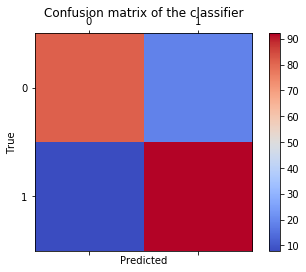


==> RandomForestClassifier
  Cols:  ['volatile acidity', 'citric acid', 'density', 'alcohol']
  Accuracy  = 0.873475 

Confusion Matrix Stats
0/0: 86.59% (1388/1603)
0/1: 13.41% (215/1603)
1/0: 11.85% (179/1511)
1/1: 88.15% (1332/1511)


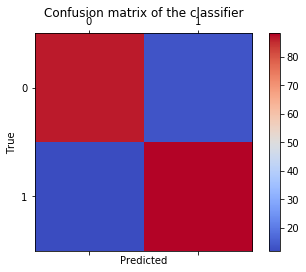

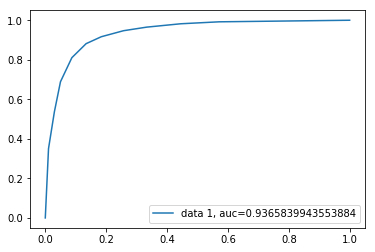


==> LogisticRegression
  Accuracy  = 0.739884 

Confusion Matrix Stats
0/0: 69.31% (1111/1603)
0/1: 30.69% (492/1603)
1/0: 21.05% (318/1511)
1/1: 78.95% (1193/1511)


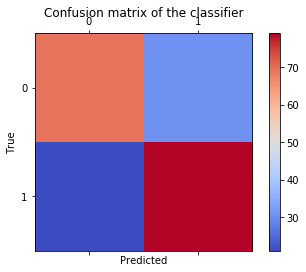

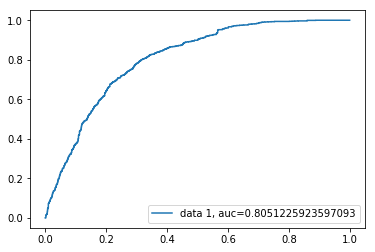


==> GaussianNB
  Accuracy  = 0.619782 

Confusion Matrix Stats
0/0: 39.43% (632/1603)
0/1: 60.57% (971/1603)
1/0: 14.10% (213/1511)
1/1: 85.90% (1298/1511)


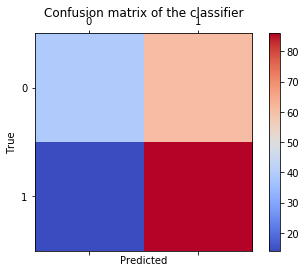

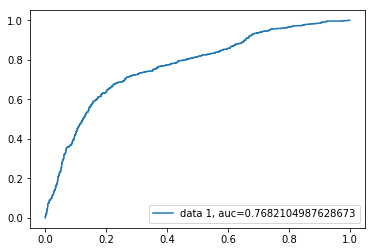


==> KNeighborsClassifier
  Accuracy  = 0.806358 

Confusion Matrix Stats
0/0: 68.75% (1102/1603)
0/1: 31.25% (501/1603)
1/0: 6.75% (102/1511)
1/1: 93.25% (1409/1511)


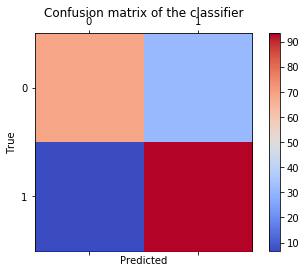

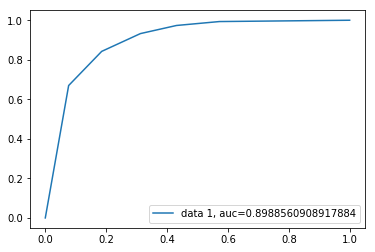


==> BaggingClassifier
  Accuracy  = 0.881182 

Confusion Matrix Stats
0/0: 87.09% (1396/1603)
0/1: 12.91% (207/1603)
1/0: 10.79% (163/1511)
1/1: 89.21% (1348/1511)


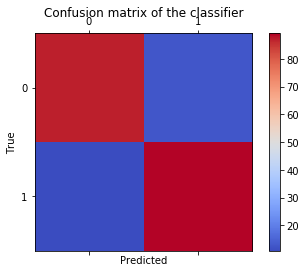

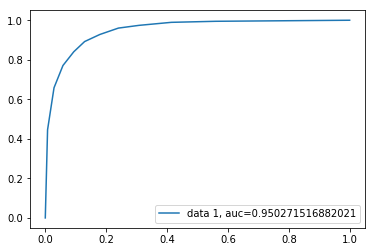

In [129]:
plot_auc = True
run_ml(x_train,x_test,y_train,y_test)
